# Final Project

**Due date: Saturday, December 9th**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

In [40]:
library('googlesheets4')
library(tidyverse)
gs4_deauth()
ufo_data = read_sheet('https://docs.google.com/spreadsheets/d/1btbaGTkvsonb_UlZEfoAxd0e7Ma2ngzpT49NPg7g8cM/edit#gid=0')

ufo_data |> head()

✔ Reading from UFO Sightings Data.

✔ Range Sheet1.



Date / Time,Country,City,State,Shape,Summary,lat,lng
<list>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
##########,USA,Waynesboro,VA,Sphere,Bright round object hovering in sky.,38.06523,-78.90589
##########,USA,Louisville,KY,Unknown,"Multiple craft ascending from north of Shelbyville road, very bright and very quiet in comparison to passenger planes seen in the sky a",38.25424,-85.75941
##########,USA,Santa Rosa,CA,Sphere,Bright orange planet-like object sighted near Cassiopia,38.44047,-122.71443
##########,USA,Fresno,CA,Circle,Twelve orange globes in formation over Fresno,36.72953,-119.70886
##########,USA,Reymert,AZ,Circle,"While camping in the Cottonwood canyon Rd., along the gas line rd., I awoke to my dog growling and staring north. I looked to see what",33.22978,-111.20929
##########,USA,Redding,CA,Light,Stargazing I saw a star just appear then moves slowly then gradually fade out,40.58636,-122.39168


## UFO Data
The data set being analyzed is provided by The National UFO Reporting Center Online Database (https://nuforc.org/) which is a non-profit Washington state corporation founded by Robert J. Gribble in 1974. According to their website, over 170,000 reports have been processed mainly through their website but also through a hotline prior to 1994. Both routes provide anonymity which many believe is what makes it so popular compared to other websites and hotlines run by law enforcement agencies. 

This particular data set is looking only at reports from the United States in 2016. The data set contains 5177 observations and the following 8 variables: 

        1. Date/Time 
        2. Country 
        3. City 
        4. State 
        5. Shape
        6. Summary
        7. Latitude 
        8. Longitude 
        

## Issues with the Data 



One of the largest is that the Date/Time variable has different non-uniform formats. This variable will need to be adapted accordingly in order to proceed with analyses. Additionally, the number of states are listed as 59. While this doesn't technically impact the data it is an important observation. Aside from the 50 states, the following list of Canadian territories are also included:


  1. ON - Ontario 
  2. BC - British Columbia
  3. AB - Alberta 
  4. QC - Quebec 
  5. MB - Manitoba 
  6. NB - New Brunswick 
  7. NS - Nova Scotia 
  8. YT - Yukon Territory


In [26]:
unique_states <- unique(ufo_data$State)
print(unique_states)

 [1] VA KY CA AZ OH AR AK MO UT TX AB HI OR KS FL NM TN CO WA OK NV NY CT SC AL
[26] GA VT NJ IL IA MI MD MN MT LA PA SD MA NC ME NS SK NH ON WV IN MS WY WI RI
[51] NE ND BC ID DE QC MB YT NB
59 Levels: CA FL AZ WA NC NY CO PA OR IL OH TX MI NJ GA WI MO TN VA MA ... YT


Warning message in geom_histogram(stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


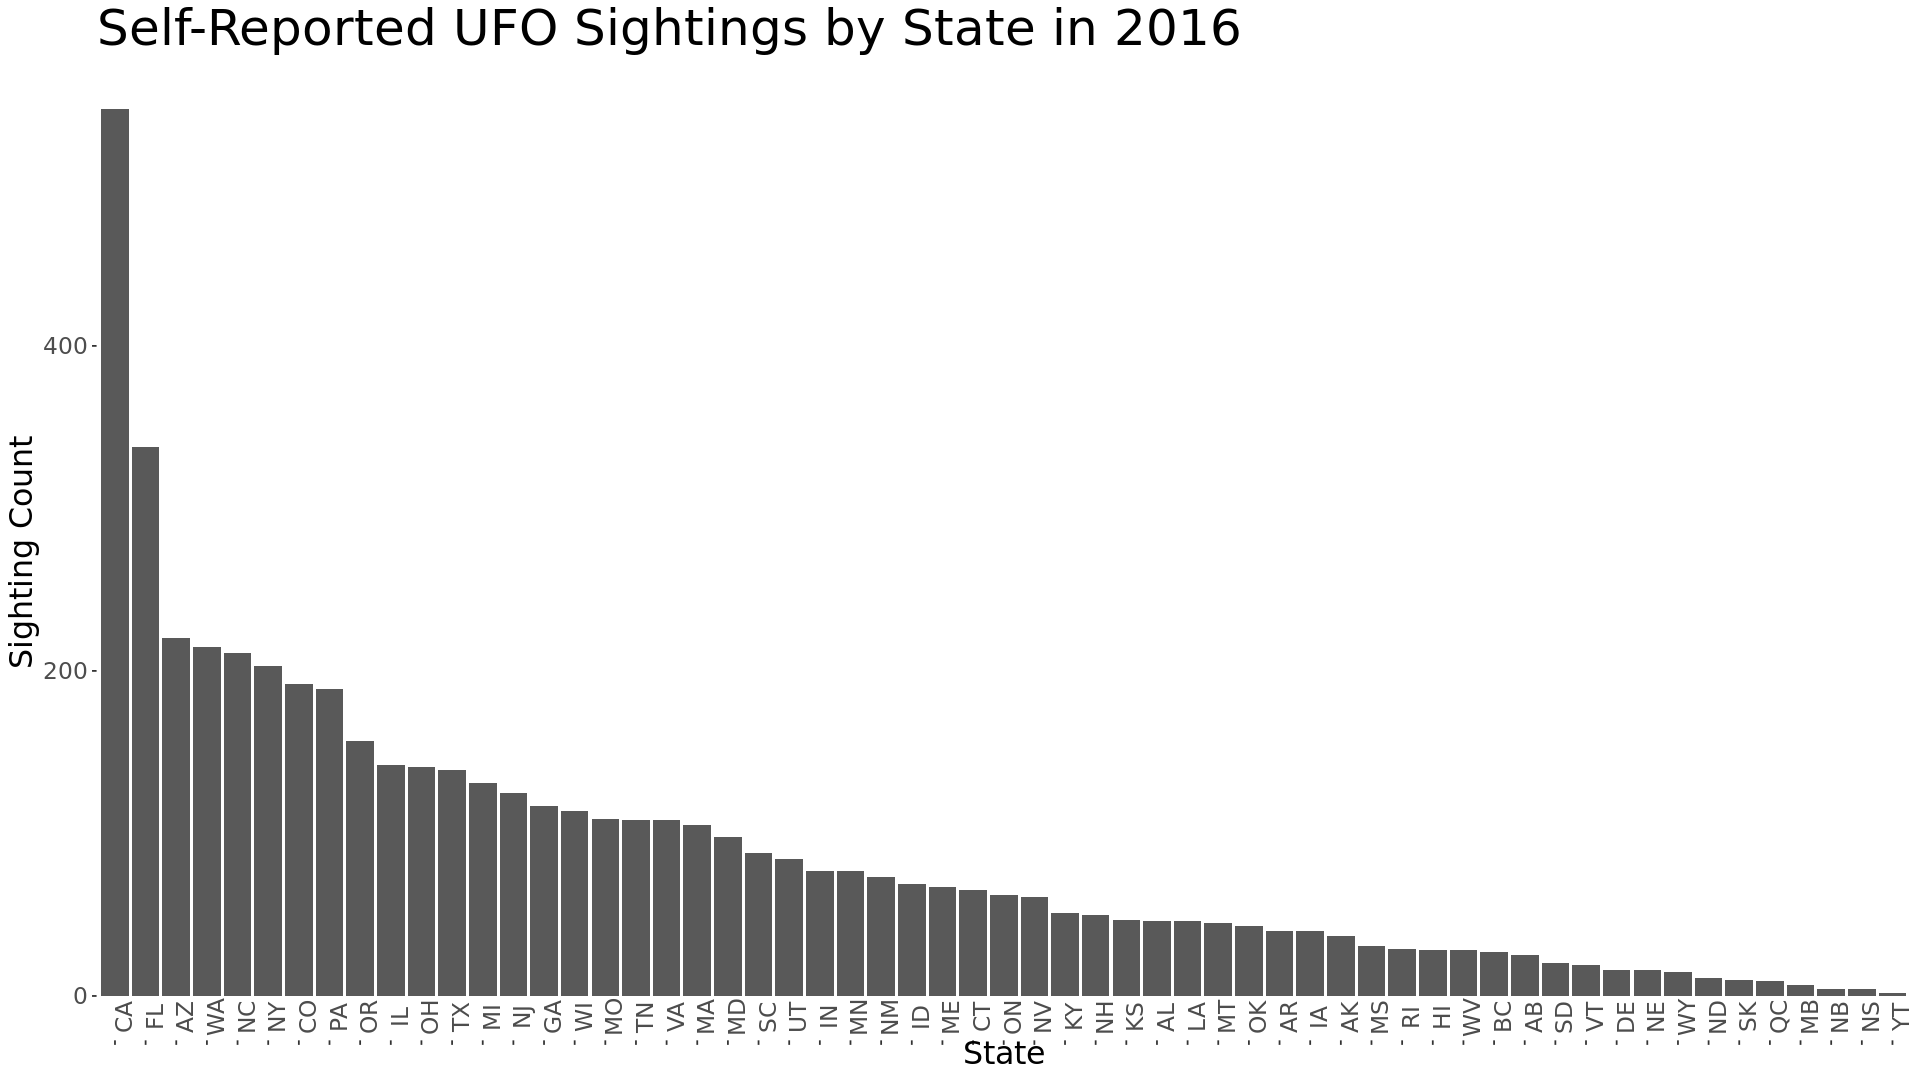

In [38]:
state_counts <- ufo_data %>%
  group_by(State) %>%
  summarise(count = n()) %>%
  arrange(desc(count))


ufo_data$State <- factor(ufo_data$State, levels = state_counts$State)

options(repr.plot.width = 16, repr.plot.height = 9)
ggplot(ufo_data, aes(x = State)) +
  geom_histogram(stat = "count") + labs(x = 'State', y = 'Sighting Count') +
  theme(
    axis.text.x = element_text(angle = 90, margin = margin(t = -1.0, unit = "cm")),
    panel.background = element_rect(fill = 'white', color = 'white'),
    axis.text = element_text(size = 14),  
    axis.title = element_text(size = 19), 
    legend.text = element_text(size = 12)) +
  ggtitle("Self-Reported UFO Sightings by State in 2016") +
  theme(plot.title = element_text(size = 30))

Warning message:
“ 2958 failed to parse.”
Warning message in geom_histogram(stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”
Warning message:
“Removed 2958 rows containing non-finite values (`stat_count()`).”


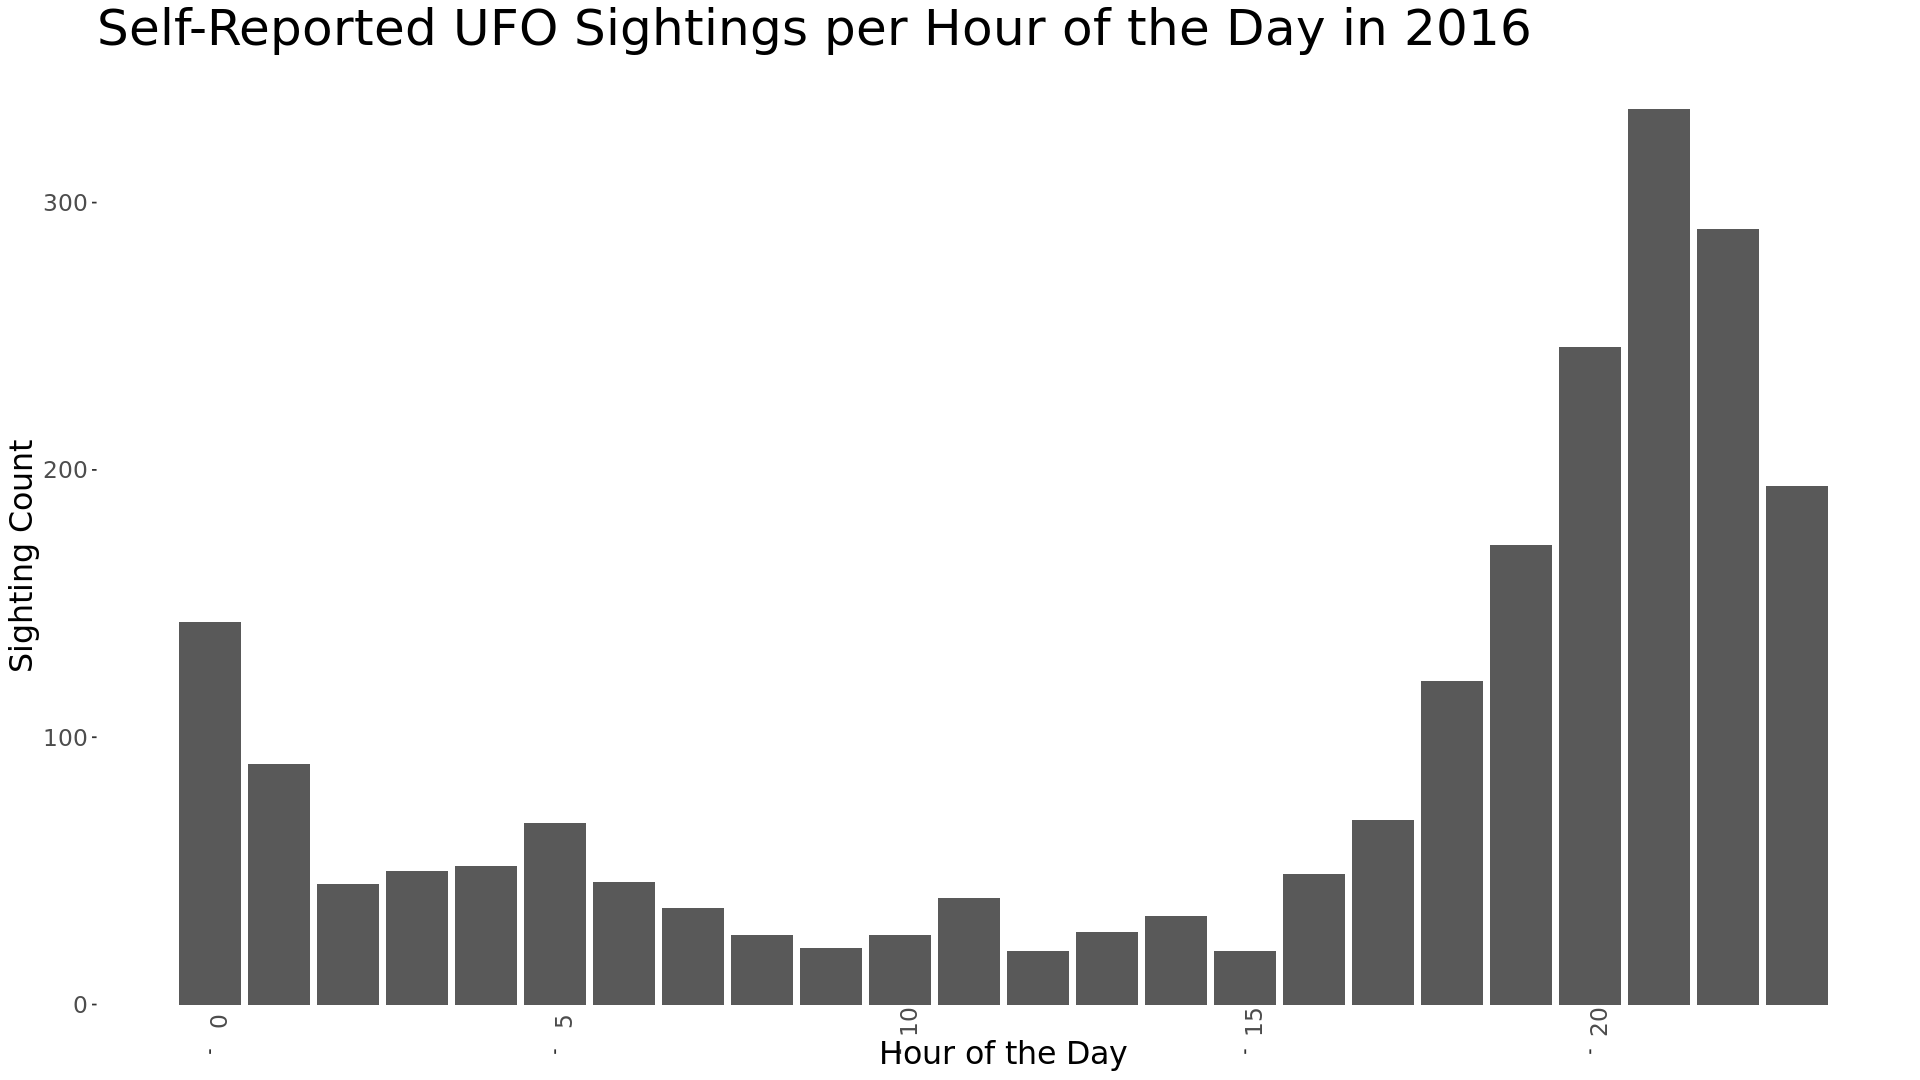

In [52]:
datetime <- c(ufo_data$"Date / Time")

parsed_date_time <- parse_date_time(datetime, c("mdy HM", "ymd HMS"))
hours <- hour(parsed_date_time)

options(repr.plot.width = 16, repr.plot.height = 9)
ggplot(ufo_data, aes(x = hours)) +
  geom_histogram(stat = "count") + 
  labs(x = 'Hour of the Day', y = 'Sighting Count') +
  theme(
    axis.text.x = element_text(angle = 90, margin = margin(t = -1.0, unit = "cm")),
    panel.background = element_rect(fill = 'white', color = 'white'),
    axis.text = element_text(size = 14),  
    axis.title = element_text(size = 19), 
    legend.text = element_text(size = 12)) +
  ggtitle("Self-Reported UFO Sightings per Hour of the Day in 2016") +theme(plot.title = element_text(size = 30))

Warning message in geom_histogram(stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”
Warning message:
“Removed 2958 rows containing non-finite values (`stat_count()`).”
Warning message:
“Removed 2958 rows containing non-finite values (`stat_count()`).”


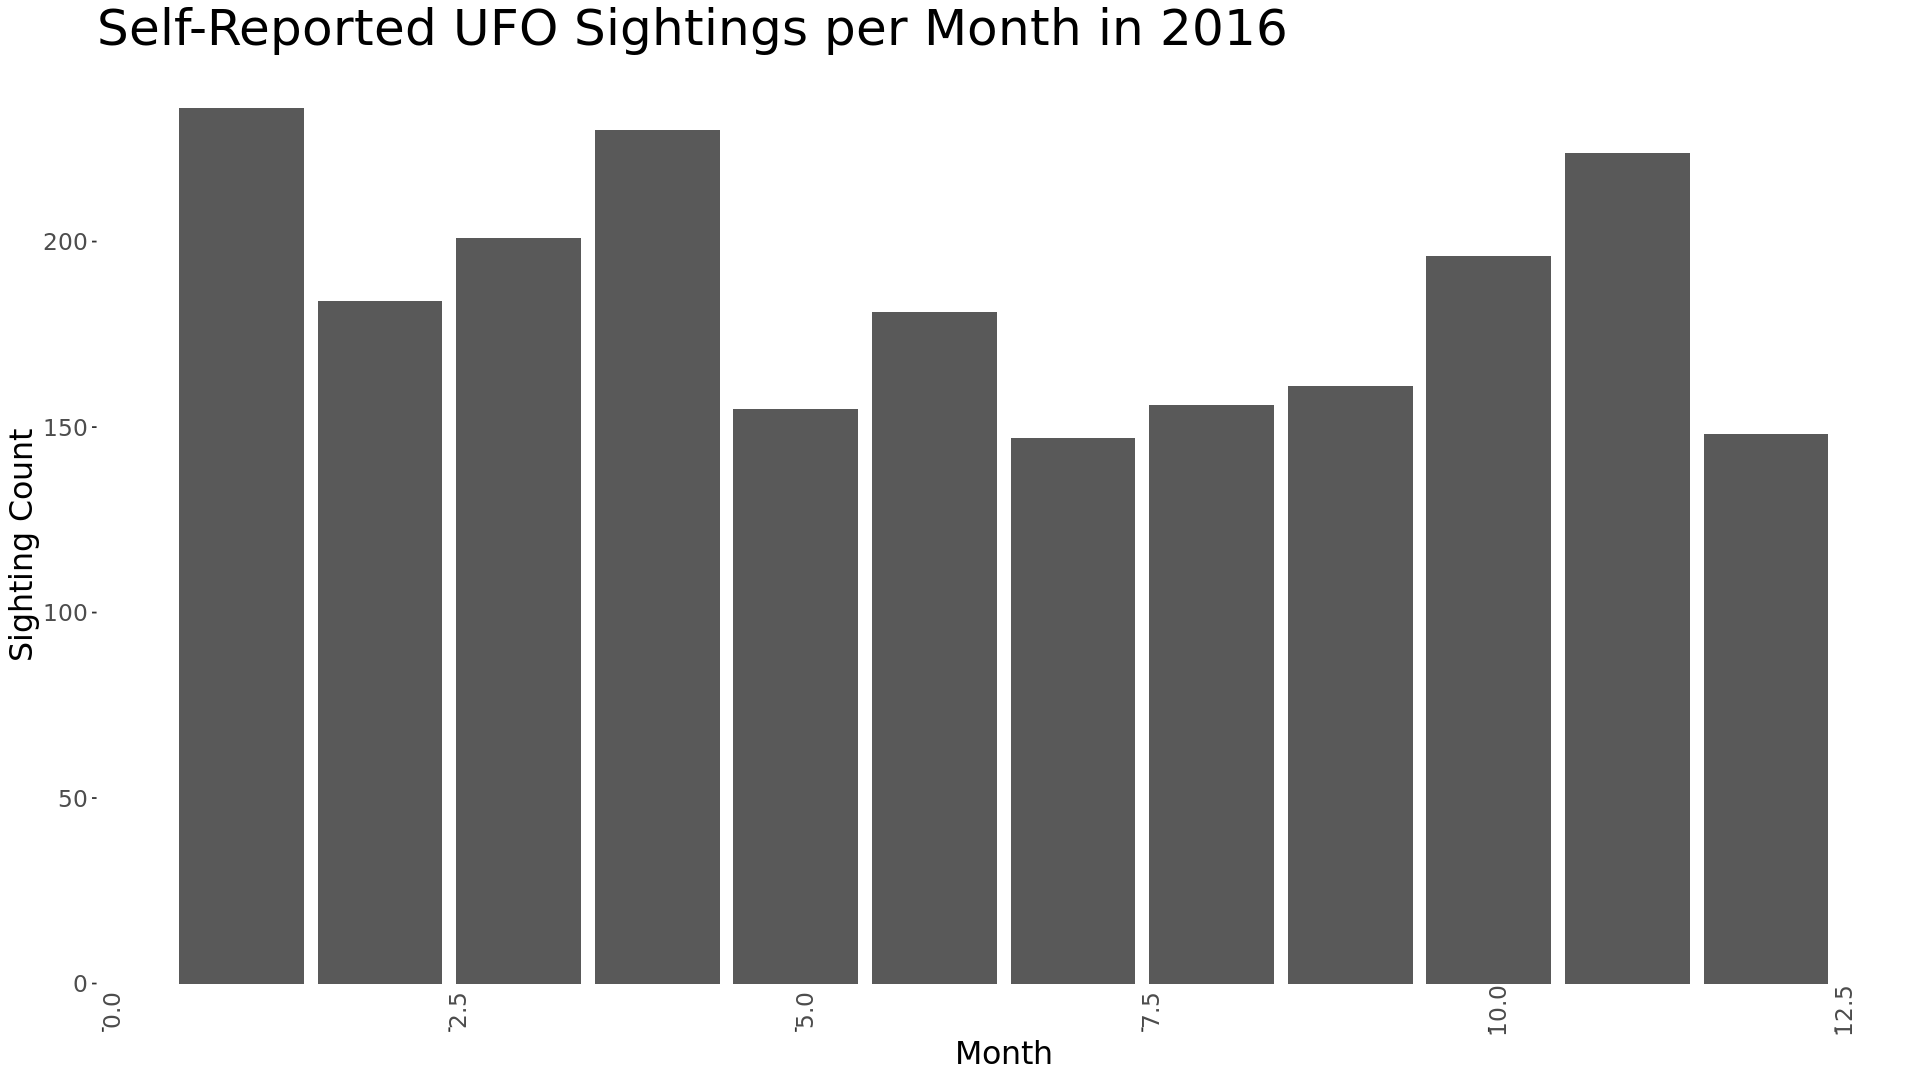

In [50]:
ufo_month <- month(parsed_date_time)

ggplot(ufo_data, aes(x = ufo_month)) +
  geom_bar() + geom_histogram(stat = "count") + 
  labs(x = 'Month', y = 'Sighting Count') +
  theme(
    axis.text.x = element_text(angle = 90, margin = margin(t = -1.0, unit = "cm")),
    panel.background = element_rect(fill = 'white', color = 'white'),
    axis.text = element_text(size = 14),  
    axis.title = element_text(size = 19), 
    legend.text = element_text(size = 12)) +
  ggtitle("Self-Reported UFO Sightings per Month in 2016") +theme(plot.title = element_text(size = 30))

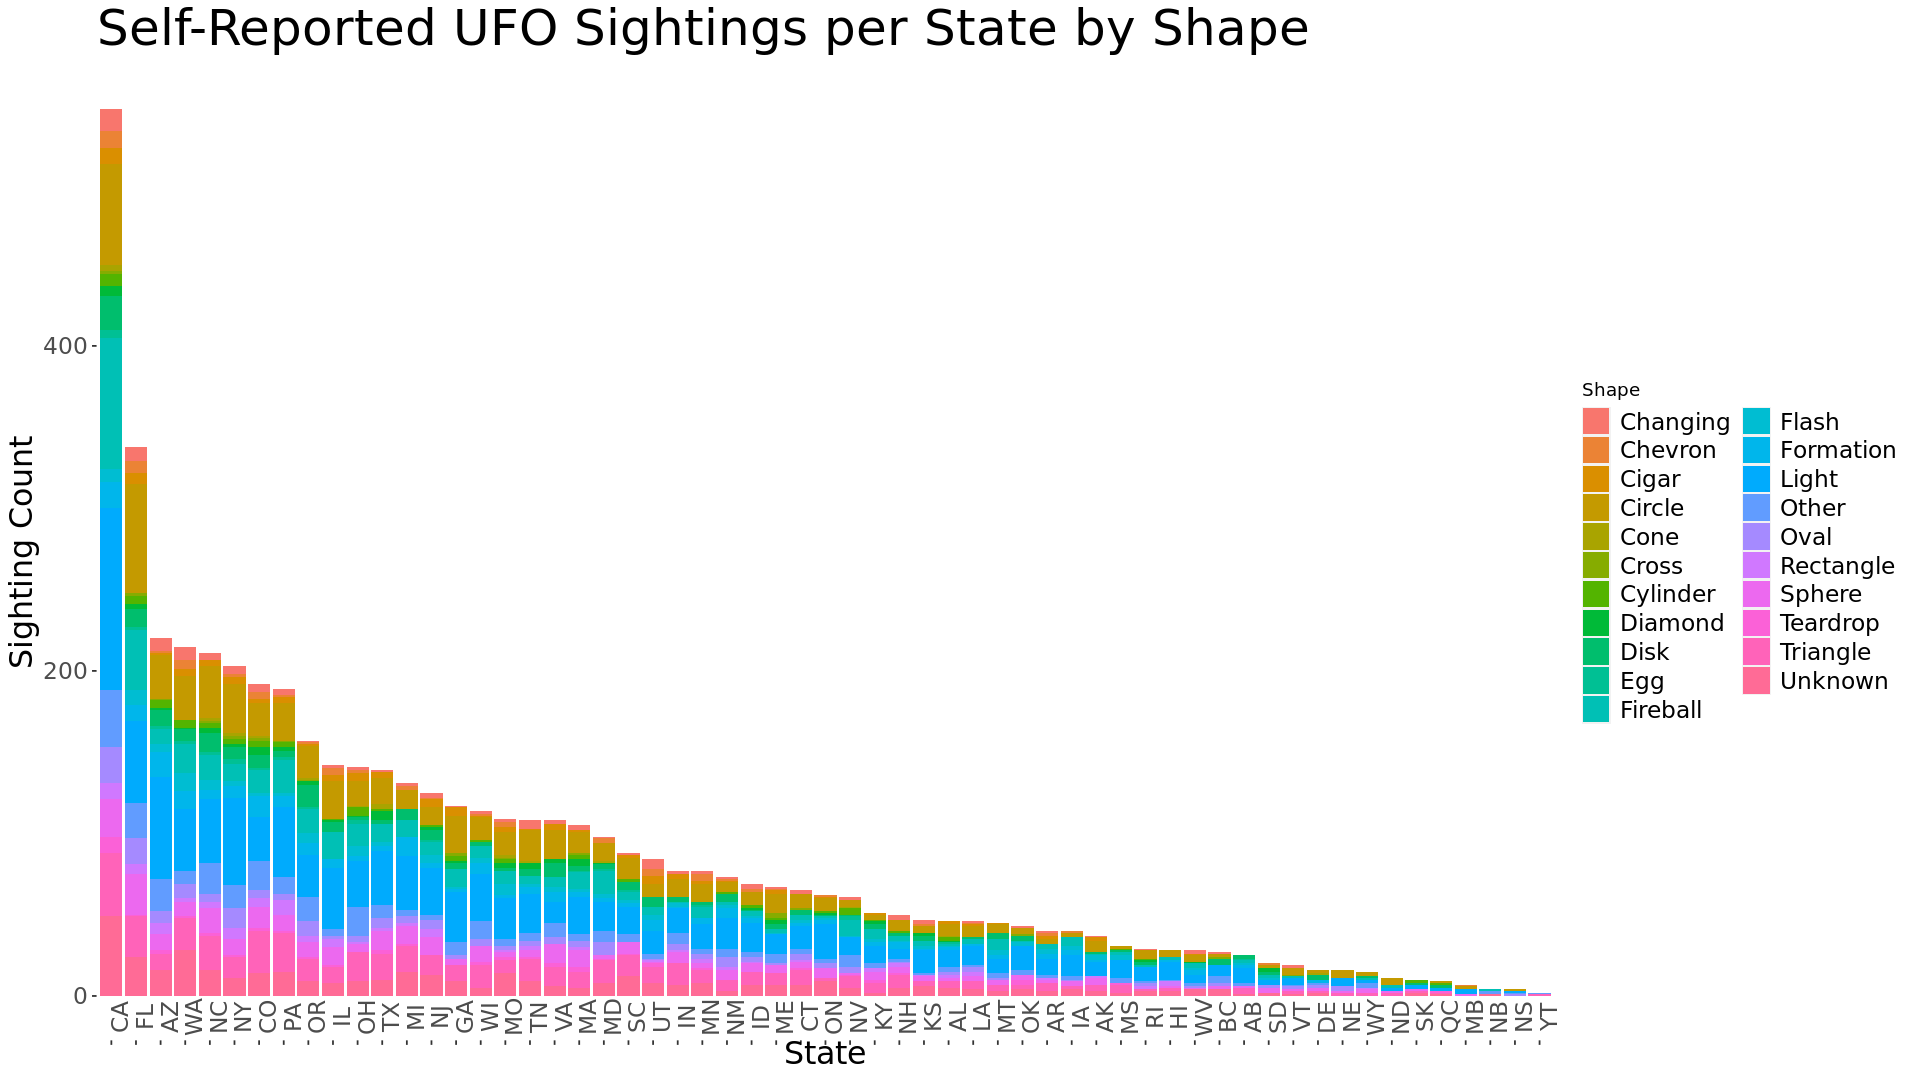

In [54]:

ggplot(ufo_data, aes(x = State, fill = Shape)) +
  geom_bar() + 
  labs(x = 'State', y = 'Sighting Count') +
  theme(
    axis.text.x = element_text(angle = 90, margin = margin(t = -1.0, unit = "cm")),
    panel.background = element_rect(fill = 'white', color = 'white'),
    axis.text = element_text(size = 14),  
    axis.title = element_text(size = 19), 
    legend.text = element_text(size = 14)) + 
  ggtitle("Self-Reported UFO Sightings per State by Shape") +theme(plot.title = element_text(size = 30))

## What can we take away from these plots? 
From the plots we can make the following conclusions: 

  1. California had the largest number of UFO sightings. 
  2. Most sightings were seen between 8 PM and 10 PM. Likely people are 
  3. January had the most sightings per month in 2016 
  4. We can see a similar distribution between the states in regard to proportions of shapes of UFOs. For example, changing and chevron seem to be the smallest proportion of UFO shape for all states.  